Import packages and load in serialized database file.

In [ ]:
using SolarChem, CairoMakie, Statistics
x = SolarChem.loadastromatdata();

Caution: No concentration unit identified for heading `N (ng)`  [excluded from dataset, see ?unitconversionfactor for accepted units]
Caution: No concentration unit identified for heading `F (g)`  [excluded from dataset, see ?unitconversionfactor for accepted units]
Caution: No concentration unit identified for heading `F (g) 1S`  [excluded from dataset, see ?unitconversionfactor for accepted units]
Caution: No concentration unit identified for heading `Rb (mol/g)`  [excluded from dataset, see ?unitconversionfactor for accepted units]
Caution: No concentration unit identified for heading `Sr (ng)`  [excluded from dataset, see ?unitconversionfactor for accepted units]
Caution: No concentration unit identified for heading `Mo (ng)`  [excluded from dataset, see ?unitconversionfactor for accepted units]
Caution: No concentration unit identified for heading `Cd (ng)`  [excluded from dataset, see ?unitconversionfactor for accepted units]
Caution: No concentration unit identified for heading 

In [2]:
d = estimateuncertainty(trimextremes(x),5);

d = exclude(d, :comment, ("weather", "fusion", "CAI", "matrix", "chondrule")); # Exclude certain topics/comments: weather, fusion,  
d = excludeheated(d); 


12 extremes replaced with NaNs

Calculated σ(H)=0.03824010963047455 (n=120)
Calculated σ(B)=0.1498017679064901 (n=29)
Calculated σ(F)=0.05670424757348662 (n=79)
Calculated σ(Cl)=0.03886835160057304 (n=74)
Calculated σ(Sn)=0.038269364017586543 (n=36)
Calculated σ(I)=0.05857437432941761 (n=37)


# Outer Solar System

In [3]:
doss = pullgroup(d, SolarChem.outergroups())

## Remove outliers, errors:

doss.C[findfirst(x -> x =="https://page.astromat.org/dataset/fd3cynsBjW5SsTLVHRpM", doss.dataset)]=NaN # Anomalous, high-C outlier.
allendecai = findfirst(doss.name .== "Allende" .&& doss.dataset .== "https://page.astromat.org/dataset/T-yOt3QBpybrwNsBY-ax")
anomhighTi = findfirst(doss.dataset.=="https://page.astromat.org/dataset/ktygynsBjW5SsTLVdPyj") # Anomolous chondrite ALH85085 with very high bulk Ti. 

pcp = findall(doss.dataset .== "https://page.astromat.org/dataset/HwqTWoYB_AwVtctyi_xc") # "Poorly characterized phases" or serpentine-tochilinite intergrowths.

for i = keys(doss)
    if i ∉ SolarChem.metadata()
        doss[i][373]= doss[i][1503]=  doss[i][findfirst(doss.dataset .== "https://page.astromat.org/dataset/Uw23aYYB_AwVtctyZ9Dk")] = NaN # AstroMat errors.
        doss[i][anomhighTi] = doss[i][allendecai] = NaN 
        doss[i][pcp] .= NaN
    end
end
countmeasurements(doss,allsolar())

Caution: input name :Sr is not a name in the provided dataset. I am skipping it. 
NamedTuple with 29 elements:
  C::Int64 = 3
  Na::Int64 = 526
  Mg::Int64 = 495
  Al::Int64 = 469
  Si::Int64 = 115
  S::Int64 = 78
  Ca::Int64 = 550
  Sc::Int64 = 2
  Ti::Int64 = 47
  V::Int64 = 1
  ⋮


Caution: input name :Sr is not a name in the provided dataset. I am skipping this label.


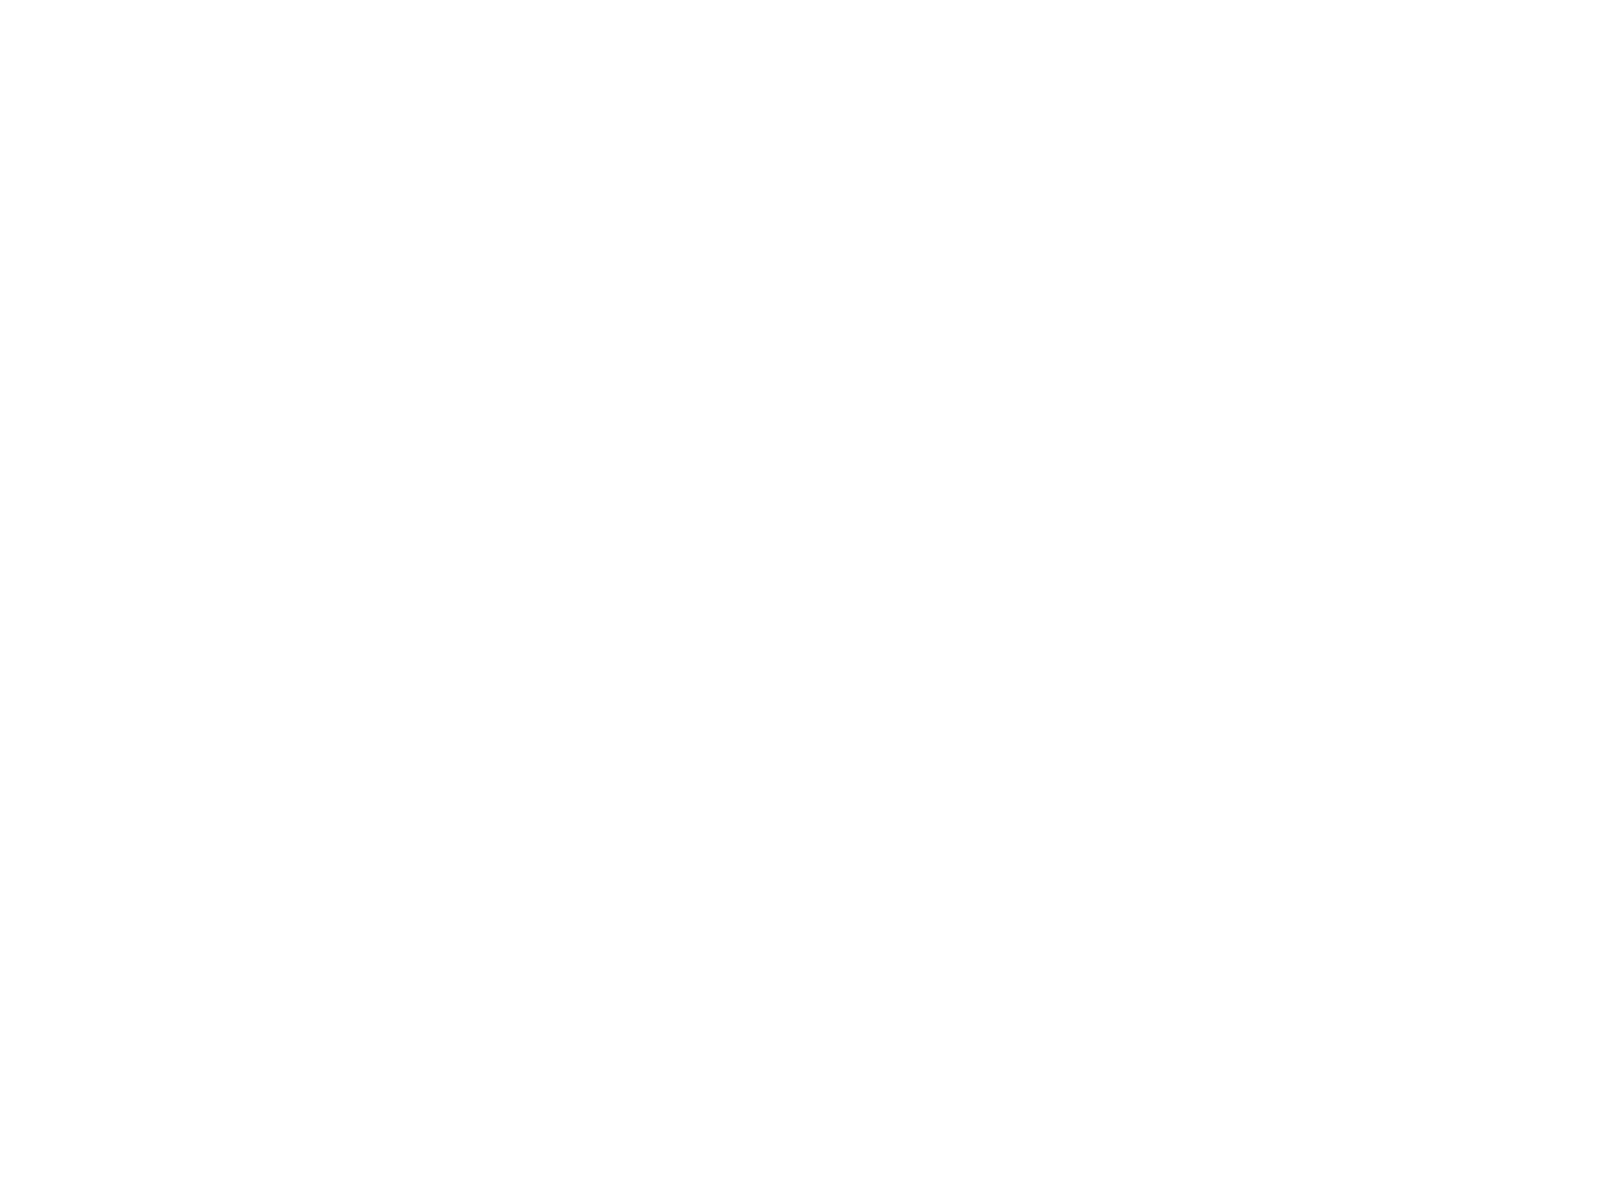

In [4]:
bse = bootstrapelements(100_000, doss, allsolar(Fe=true))
hh = histpanels(bse,labelsuffix=" (g/g)", darkmode=true)
hh

In [6]:
ndoss = countmeasurements(doss, allsolar(Fe=true))

Caution: input name :Sr is not a name in the provided dataset. I am skipping it. 
el | fractional abundance (g/g) | n
C | 0.0006288584931524008 ± 7.512473452938441e-5 | 3
Na | 0.003201487344090435 ± 6.23700539493683e-5 | 526
Mg | 0.12709860829741415 ± 0.0011613443371902659 | 495
Al | 0.013778819824027608 ± 0.0001654021062524477 | 469
Si | 0.14974727290029055 ± 0.0029722851986789646 | 115
S | 0.031079447707493595 ± 0.0030302388069228447 | 78
Ca | 0.01786592421051408 ± 0.0010676609889678215 | 550
Sc | 0.00900118185585302 ± 0.0007754747747868607 | 2
Ti | 0.0007908871350522395 ± 3.5057816745457073e-5 | 47
V | 0.06501190344468022 ± 0.003245639204948195 | 1
Cr | 0.003183385740336172 ± 2.4898806635992462e-5 | 523
Mn | 0.0019203056695040498 ± 0.00013929346090669518 | 535
Fe | 0.21331047288317026 ± 0.002611957307557461 | 548
Co | 0.0008076235160820025 ± 0.00014177826734113185 | 3
Ni | 0.011746216985869076 ± 0.00018149303241612566 | 463
Cu | 0.00010495242697625944 ± 8.977186989544307e-6 | 39
Zn 

Caution: :Fe is the divisor of the ratio. I am excluding this from the provided numerators.
Caution: input name :Sr is not a name in the provided dataset. I am skipping this label.
Caution: No non-NaN ratios of :C.
Caution: No non-NaN ratios of :Sc.
Caution: No non-NaN ratios of :V.
Caution: No non-NaN ratios of :Ba.
Caution: No non-NaN ratios of :La.
Caution: No non-NaN ratios of :Ce.
Caution: No non-NaN ratios of :Pr.
Caution: No non-NaN ratios of :Nd.
Caution: No non-NaN ratios of :Sm.
Caution: No non-NaN ratios of :Eu.
Caution: No non-NaN ratios of :Gd.
Caution: No non-NaN ratios of :Dy.


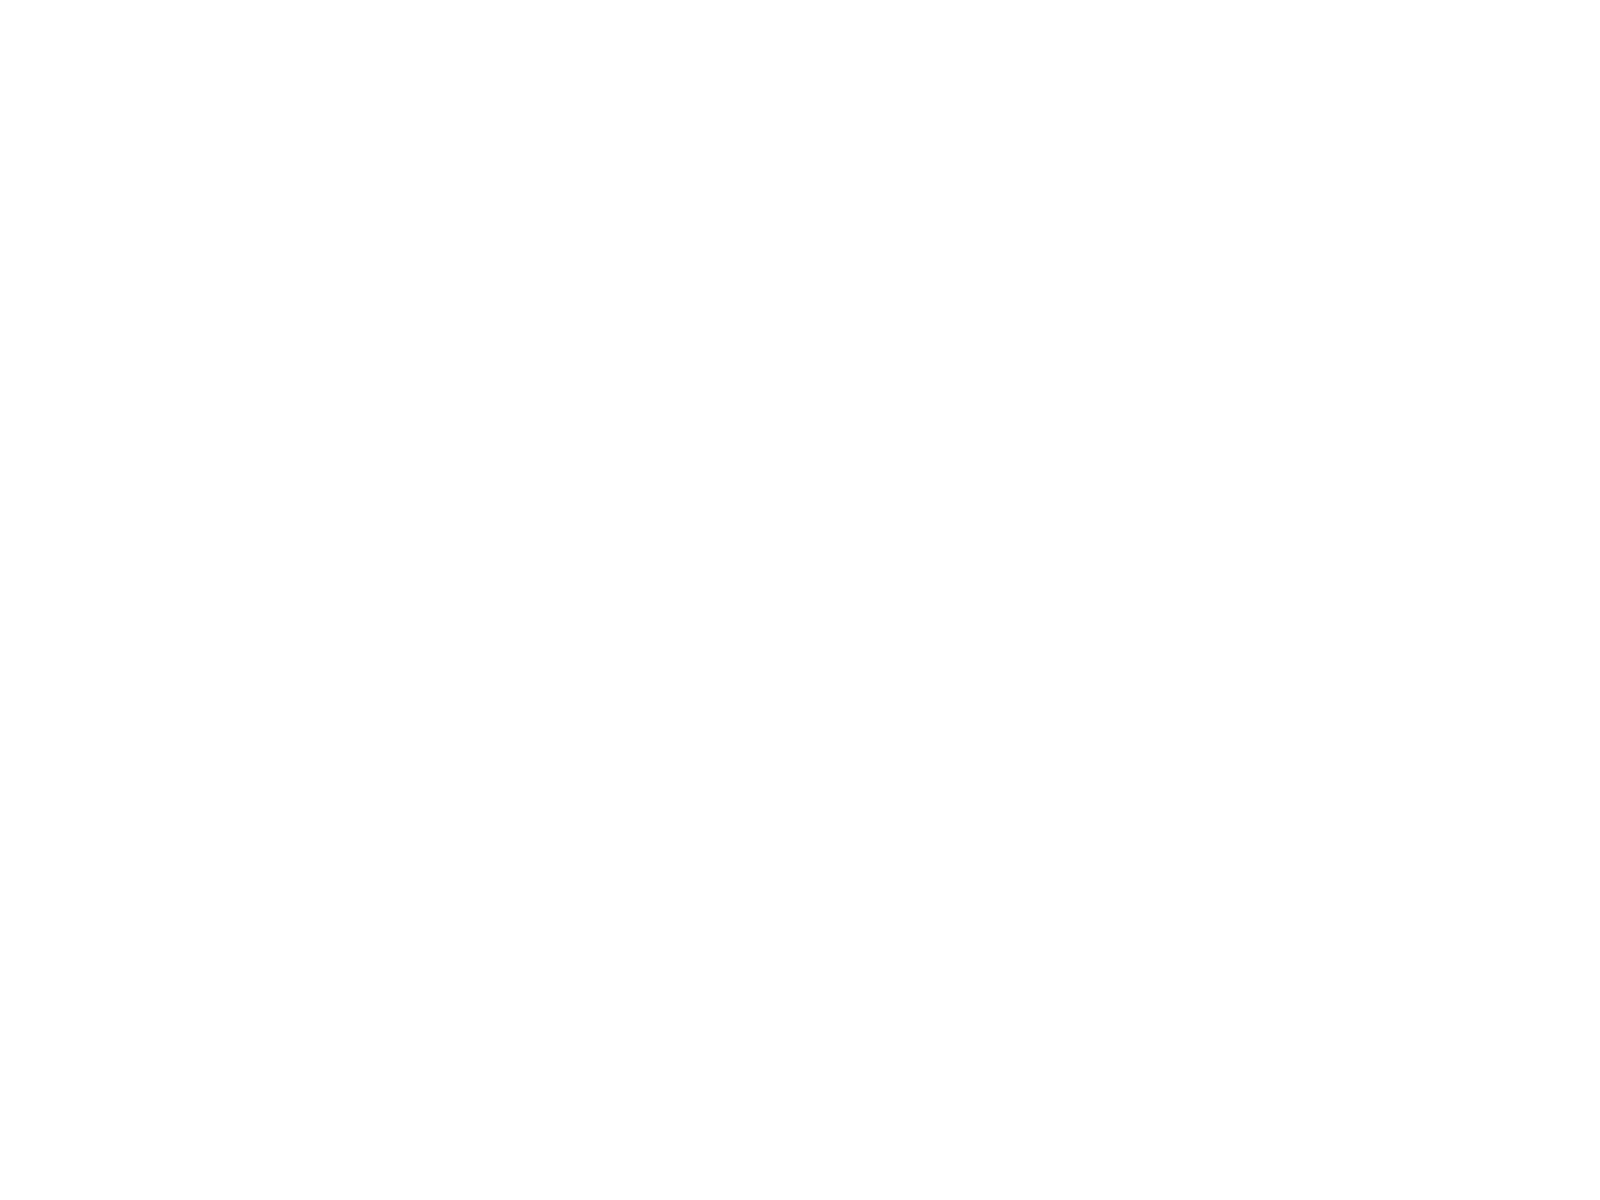

In [5]:
bsr = bootstrapratios(100_000, doss, allsolar(Fe=true),:Fe, fractional=true)
hh = histpanels(bsr, labelsuffix="/Fe",darkmode=true)
#Label(hh[0,:],"elements",color=:white,fontsize=24)
hh

In [8]:
outerFe=ratiosummary(bse, bsr, ratiocounts=countratios(doss, allsolar(),:Fe), minratios=3)

Caution: input name :Sr is not a name in the provided dataset. I am skipping it. 


([:C, :Na, :Mg, :Al, :Si, :S, :Ca, :Sc, :Ti, :V  …  :Zr, :Ba, :La, :Ce, :Pr, :Nd, :Sm, :Eu, :Gd, :Dy], [0.002948090099152447 0.0003540301702627929; 0.01456358328918755 0.00033832146389119953; … ; 0.0013595804634198236 6.986516014927186e-5; 1.6557379138613902e-6 9.129558673605364e-8])

# Inner Solar System

In [7]:
diss = pullgroup(d, SolarChem.innergroups())

## Remove mistakes:

diss.Ca[findfirst(diss.Ca .> 0.9)] = .0092
diss.Cr[findfirst(diss.Cr .> 0.3)] = .0031

countmeasurements(diss,allsolar())

Caution: input name :Sr is not a name in the provided dataset. I am skipping it. 
NamedTuple with 29 elements:
  C::Int64 = 90
  Na::Int64 = 705
  Mg::Int64 = 754
  Al::Int64 = 690
  Si::Int64 = 257
  S::Int64 = 129
  Ca::Int64 = 708
  Sc::Int64 = 0
  Ti::Int64 = 234
  V::Int64 = 0
  ⋮


Caution: input name :Sr is not a name in the provided dataset. I am skipping this label.
Caution: No :Sc data.
Caution: No :V data.
Caution: No :La data.
Caution: No :Ce data.
Caution: No :Nd data.
Caution: No :Sm data.
Caution: No :Eu data.
Caution: No :Gd data.


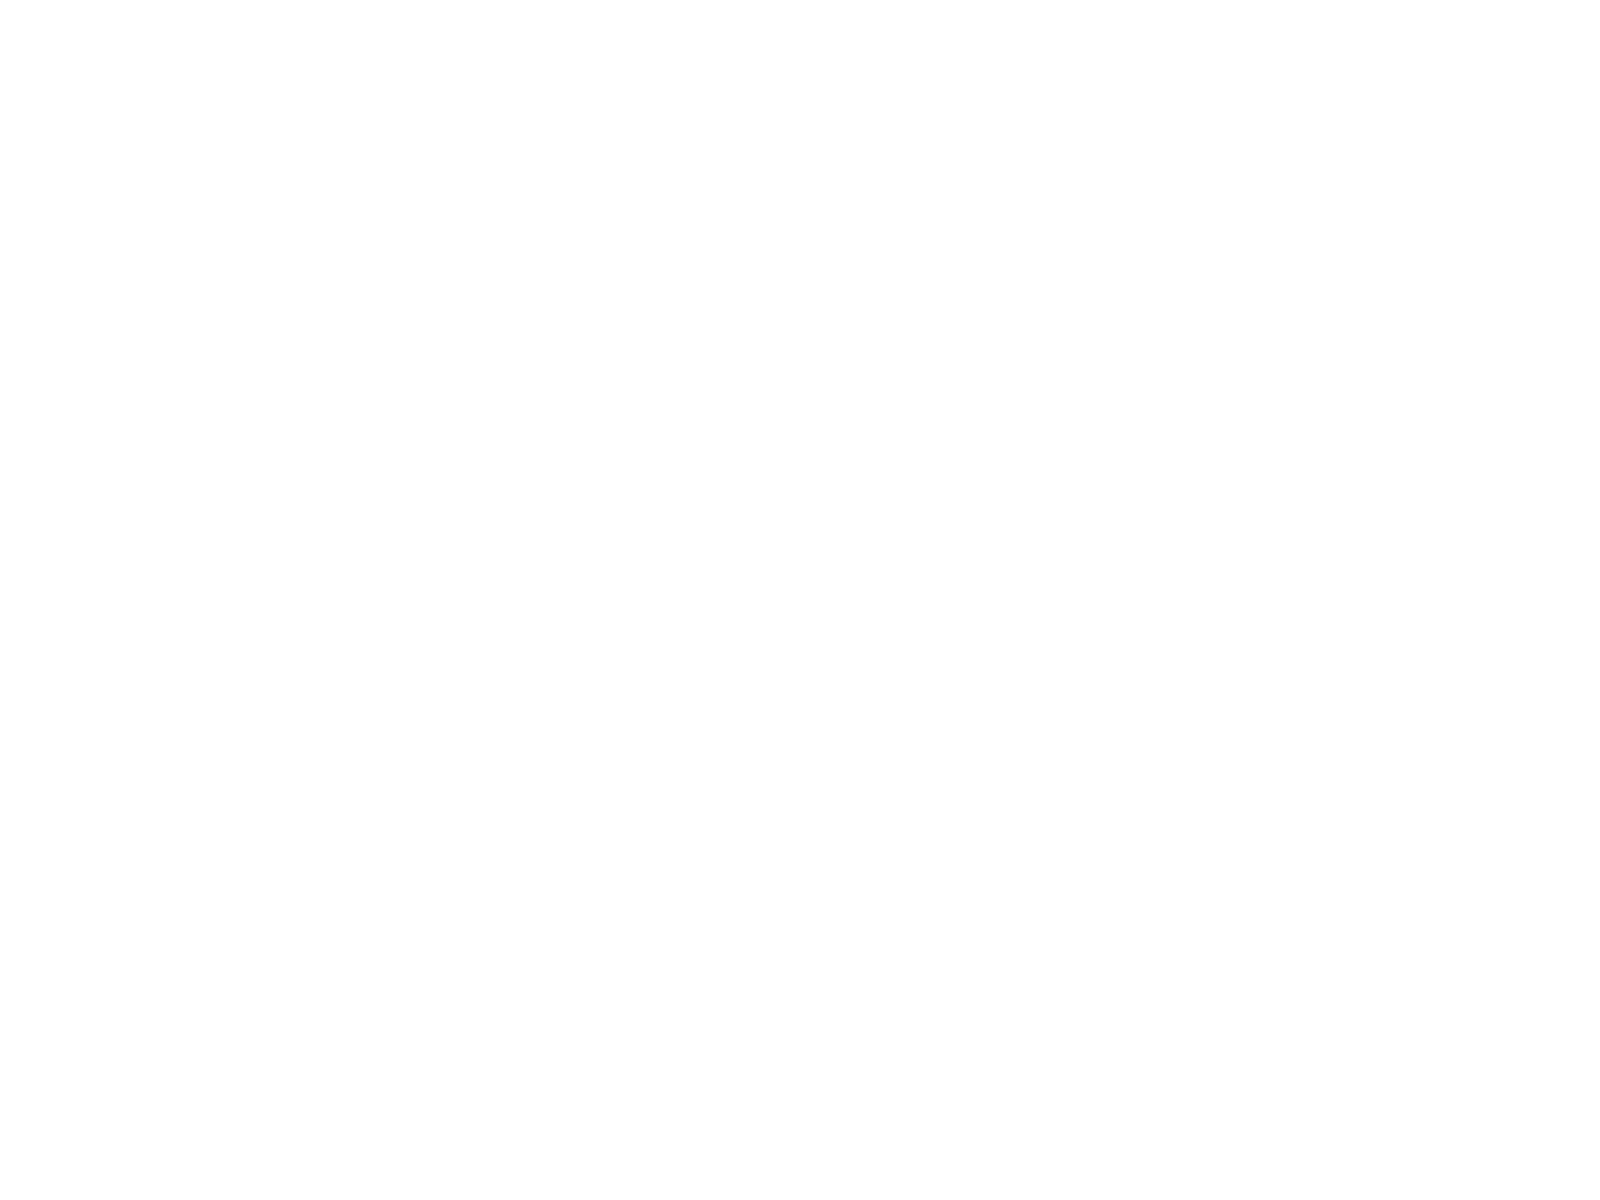

In [8]:
bse = bootstrapelements(100_000, diss, allsolar())
hh = histpanels(bse,labelsuffix=" (g/g)", darkmode=true)
hh

In [11]:
#sort(diss.Ca[.!isnan.(diss.Ca)])
# diss.dataset[i], diss.name[i], diss.Cr[i], i
# findall(diss.Cr .> 0.3)
#countratios(diss,allsolar(),:Fe)

Caution: :Fe is the divisor of the ratio. I am excluding this from the provided numerators.
Caution: input name :Sr is not a name in the provided dataset. I am skipping this label.
Caution: No non-NaN ratios of :C.
Caution: No non-NaN ratios of :Sc.
Caution: No non-NaN ratios of :V.
Caution: No non-NaN ratios of :Cu.
Caution: No non-NaN ratios of :Ba.
Caution: No non-NaN ratios of :La.
Caution: No non-NaN ratios of :Ce.
Caution: No non-NaN ratios of :Pr.
Caution: No non-NaN ratios of :Nd.
Caution: No non-NaN ratios of :Sm.
Caution: No non-NaN ratios of :Eu.
Caution: No non-NaN ratios of :Gd.


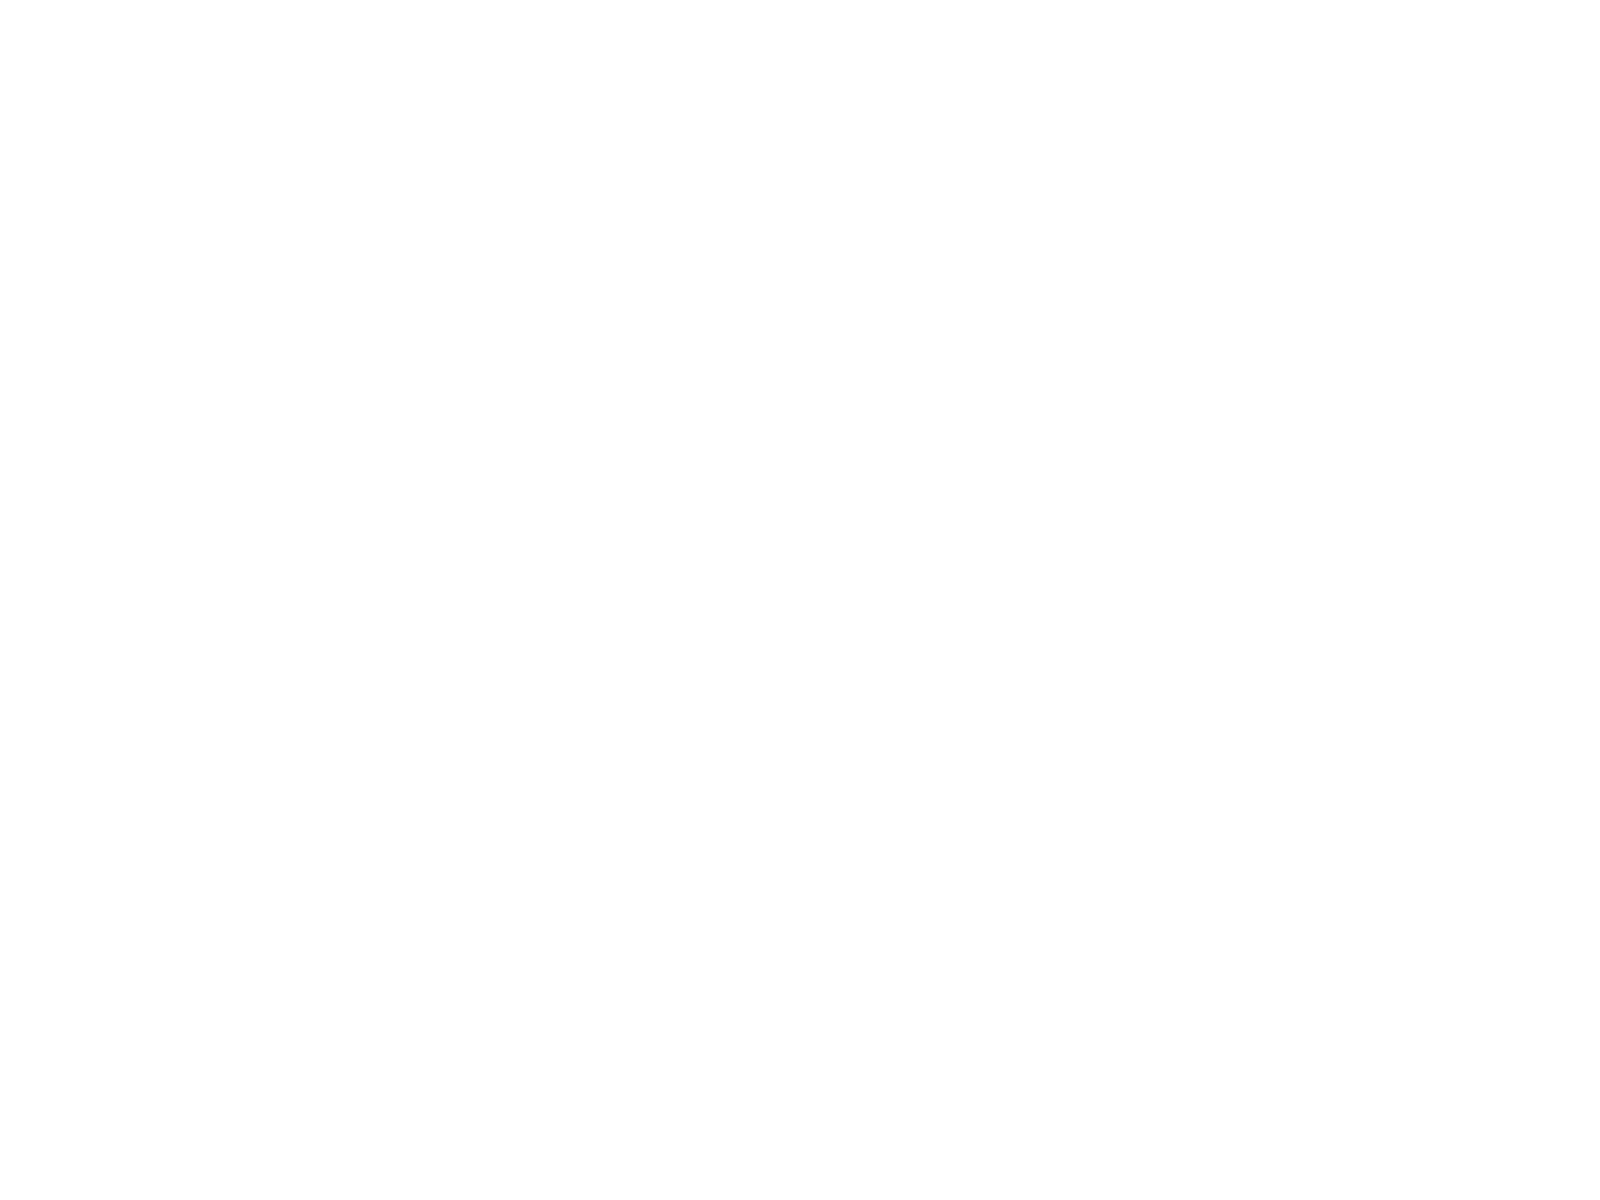

In [10]:
bsr = bootstrapratios(100_000, diss, allsolar(Fe=true),:Fe, fractional=true)
hh = histpanels(bsr, labelsuffix="/Fe",darkmode=true)
hh

In [15]:
ndiss = countmeasurements(diss, majors())
innerFe = ratiosummary(bse, bsr)
lf = LoddersFegley1998()

for i = axes(innerFe[2],1)
    if isnan(innerFe[2][i,1])
    innerFe[2][i,:] .= lf.inner[innerFe[1][i]] .* (1, 0.1)
    end
end
hcat(innerFe[1], innerFe[2])

27×3 Matrix{Any}:
 :C   0.00496275  0.000886354
 :Na  0.0374416   0.000706787
 :Mg  0.746005    0.0133598
 :Al  0.0717979   0.00253953
 :Si  1.10285     0.0366875
 :S   0.440225    0.01527
 :Ca  0.0750783   0.00248286
 :Sc  7.575e-6    7.575e-7
 :Ti  0.00541029  0.000385089
 :V   6.9e-5      6.9e-6
 ⋮                
 :Ba  1.55147e-5  1.89049e-6
 :La  2.825e-7    2.825e-8
 :Ce  7.78833e-7  7.78833e-8
 :Pr  1.98211e-5  5.90489e-6
 :Nd  5.482e-7    5.482e-8
 :Sm  1.785e-7    1.785e-8
 :Eu  6.83333e-8  6.83333e-9
 :Gd  2.576e-7    2.576e-8
 :Dy  1.90197e-5  5.44474e-6

In [43]:
clipboard(innerFe)